<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-pandas,-numpy,-and-matplotlib,-and-load-the-COVID-case-totals-data" data-toc-modified-id="Import-pandas,-numpy,-and-matplotlib,-and-load-the-COVID-case-totals-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import pandas, numpy, and matplotlib, and load the COVID case totals data</a></span></li><li><span><a href="#Let's-remind-ourselves-of-the-structure-of-the-data" data-toc-modified-id="Let's-remind-ourselves-of-the-structure-of-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's remind ourselves of the structure of the data</a></span></li><li><span><a href="#Get-the-descriptive-statistics-on-the-COVID-totals-and-demographic-columns" data-toc-modified-id="Get-the-descriptive-statistics-on-the-COVID-totals-and-demographic-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the descriptive statistics on the COVID totals and demographic columns</a></span></li><li><span><a href="#Take-a-closer-look-at-the-distribution-of-values-for-the-cases-and-deaths-columns" data-toc-modified-id="Take-a-closer-look-at-the-distribution-of-values-for-the-cases-and-deaths-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Take a closer look at the distribution of values for the cases and deaths columns</a></span></li><li><span><a href="#View-the-distribution-of-total-cases" data-toc-modified-id="View-the-distribution-of-total-cases-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>View the distribution of total cases</a></span></li></ul></div>

# Import pandas, numpy, and matplotlib, and load the COVID case totals data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import watermark
%load_ext watermark

In [3]:
%watermark -n -v -iv

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.20.0

json      : 2.0.9
numpy     : 1.19.2
matplotlib: 3.3.2
watermark : 2.1.0
pandas    : 1.2.1



In [4]:
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])

In [6]:
covidtotals.set_index('iso_code', inplace=True)

# Let's remind ourselves of the structure of the data

In [7]:
covidtotals.shape

(210, 11)

In [8]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.73,44.14
total_deaths_pm,3.62,0.82
population,"5,518,092.0","69,799,978.0"
pop_density,15.4,135.13
median_age,19.0,40.1
gdp_per_capita,"4,881.41","16,277.67"


# Get the descriptive statistics on the COVID totals and demographic columns

In [9]:
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,...,median_age,gdp_per_capita,hosp_beds
count,210.00,210.00,209.00,...,186.00,182.00,164.00
mean,"29,216.14","1,770.71","1,361.84",...,30.63,"19,539.15",3.01
std,"136,397.80","8,705.57","2,629.89",...,9.13,"19,862.35",2.46
min,0.00,0.00,0.89,...,15.10,661.24,0.10
25%,175.75,4.00,96.78,...,22.25,"4,485.33",1.30
50%,"1,242.50",25.50,282.00,...,30.25,"13,183.08",2.36
75%,"10,117.00",241.25,"1,803.32",...,39.00,"28,556.53",3.90
max,"1,790,191.00","104,383.00","19,771.35",...,48.20,"116,935.60",13.80


# Take a closer look at the distribution of values for the cases and deaths columns

In [10]:
totvars = [
    'location', 'total_cases', 'total_deaths', 'total_cases_pm',
    'total_deaths_pm'
]

In [11]:
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.89,0.00
0.10,22.90,0.00,18.49,0.00
0.20,105.20,2.00,56.74,0.40
0.30,302.00,6.70,118.23,1.73
0.40,762.00,12.00,214.92,3.97
0.50,"1,242.50",25.50,282.00,6.21
0.60,"2,514.60",54.60,546.05,12.56
0.70,"6,959.80",137.20,"1,074.03",26.06
0.80,"16,847.20",323.20,"2,208.74",50.29
0.90,"46,513.10","1,616.90","3,772.00",139.53


# View the distribution of total cases

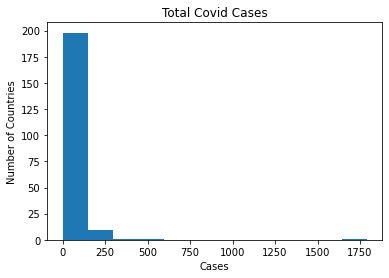

In [12]:
plt.hist(covidtotals['total_cases'] / 1000, bins=12)
plt.title('Total Covid Cases')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()